In [1]:
# Import Libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data 
jan = pd.read_csv("Sales_January_2019.csv")
feb = pd.read_csv("Sales_February_2019.csv")
mar = pd.read_csv("Sales_March_2019.csv")
apr = pd.read_csv("Sales_April_2019.csv")
may = pd.read_csv("Sales_May_2019.csv")
jun = pd.read_csv("Sales_June_2019.csv")
jul = pd.read_csv("Sales_July_2019.csv")
aug = pd.read_csv("Sales_August_2019.csv")
sep = pd.read_csv("Sales_September_2019.csv")
octo = pd.read_csv("Sales_October_2019.csv")
nov = pd.read_csv("Sales_November_2019.csv")
dec = pd.read_csv("Sales_December_2019.csv")

In [3]:
# First look 
display(jan.head(),feb.head(),mar.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


#### Merging all the dataset into one single file

In [4]:
# It's looks like we have the same number of columns in each dataset. Let's concatenate all of them 
df = pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
# Looks goood!
df.shape

(186850, 6)

### Whats was the best month for sales? How much was earned that month?

In [6]:
# We must check the dtypes of our data before:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
# We'll collect the first 2 caracters of the column "Order Date" and we need to transform this column to string type
df['Order Date']=df['Order Date'].astype('string')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  string
 5   Purchase Address  186305 non-null  object
dtypes: object(5), string(1)
memory usage: 10.0+ MB


In [9]:
df["Order Date"]=df["Order Date"].str.replace("'","")
df["Order Date"]=df["Order Date"].str.replace("b","")

In [10]:
df["Month"]=df["Order Date"].str[:2]

In [11]:
df.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
95,141327,USB-C Charging Cable,1,11.95,01/31/19 01:38,"238 Washington St, Los Angeles, CA 90001",01
96,141328,ThinkPad Laptop,1,999.99,01/06/19 23:18,"736 5th St, Seattle, WA 98101",01
97,141329,USB-C Charging Cable,1,11.95,01/01/19 16:01,"122 5th St, Portland, ME 04101",01
98,141330,Wired Headphones,1,11.99,01/21/19 13:04,"391 5th St, Portland, OR 97035",01


In [16]:
# Creating a dictionary to replace the month numbers's to the respective month
month_dict = {"01":"January","02":"February","03":"March","04":"April","05":"May","06":"June","07":"July",
             "08":"August","09":"September","10":"October","11":"November","12":"December"}

In [19]:
month_dict

{'01': 'January',
 '02': 'February',
 '03': 'March',
 '04': 'April',
 '05': 'May',
 '06': 'June',
 '07': 'July',
 '08': 'August',
 '09': 'September',
 '10': 'October',
 '11': 'November',
 '12': 'December'}

In [17]:
df["Month"]=df["Month"].replace(month_dict)

TypeError: Cannot compare types 'ndarray(dtype=object)' and 'str'

In [20]:
# Modify the data type to numeric
df["Price Each"]=pd.to_numeric(df["Price Each"],errors='coerce')
df["Quantity Ordered"]=pd.to_numeric(df["Quantity Ordered"],errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  string 
 5   Purchase Address  186305 non-null  object 
 6   Month             186305 non-null  string 
dtypes: float64(2), object(3), string(2)
memory usage: 11.4+ MB


In [22]:
# Dropping the missing values in our dataset
df=df.dropna()

In [23]:
# Creating new column that corresponds to the total sales
df["Total_Sales"] = df["Price Each"]*df["Quantity Ordered"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [24]:
# Creating a new variable to assign the month grouped
best_month=df.groupby(["Month"]).sum()
best_month.reset_index(inplace=True)
best_month

,Month,Quantity Ordered,Price Each,Total_Sales
0,01,10903.0,1.811768e+06,1.822257e+06
1,02,13449.0,2.188885e+06,2.202022e+06
2,03,17005.0,2.791208e+06,2.807100e+06
3,04,20558.0,3.367671e+06,3.390670e+06
4,05,18667.0,3.135125e+06,3.152607e+06
5,06,15253.0,2.562026e+06,2.577802e+06
6,07,16072.0,2.632540e+06,2.647776e+06
7,08,13448.0,2.230345e+06,2.244468e+06
8,09,13109.0,2.084992e+06,2.097560e+06
9,10,22703.0,3.715555e+06,3.736727e+06


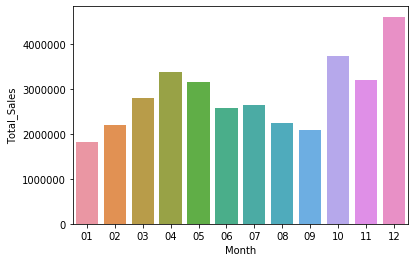

<Figure size 720000x72000 with 0 Axes>

In [25]:
# Ploting the data
sns.barplot(x="Month", y="Total_Sales", data=best_month);
plt.figure(figsize=(10000,1000));


### What city had the highest number of sales?

In [26]:
# Changing the datatype 
df["Purchase Address"]=df["Purchase Address"].astype('string')

In [27]:
# Creating a new variable thats contains the city code
city=df["Purchase Address"].str.split(pat=",",expand=True)

In [28]:
# Creating a new colunm to assign the values from the cities
df["City"]=city[1]

In [29]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin
5,141239,AAA Batteries (4-pack),1.0,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",01,2.99,San Francisco
6,141240,27in 4K Gaming Monitor,1.0,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",01,389.99,Los Angeles
7,141241,USB-C Charging Cable,1.0,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",01,11.95,San Francisco
8,141242,Bose SoundSport Headphones,1.0,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",01,99.99,Los Angeles
9,141243,Apple Airpods Headphones,1.0,150.00,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",01,150.00,San Francisco


In [30]:
# Creating a new varible that contains info for cities grouped
best_city=df.groupby(["City"]).sum()
best_city.reset_index(inplace=True)

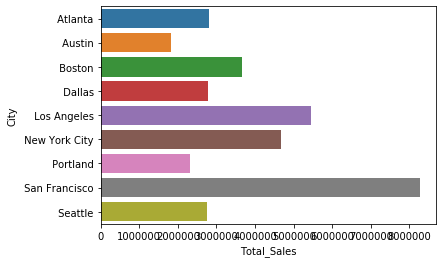

In [31]:
# Plotting the data
sns.barplot(x="Total_Sales", y="City", data=best_city);

### What time we should display the advertisements to maxime the likelihood of customer's buying products?

In [32]:
# Changing the datetype to datetime to be able to extract the hour
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Hour"]=df["Order Date"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Hour
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,Boston,21
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,Portland,14
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco,13
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles,20
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,Austin,11


In [33]:
# Creating a new variable the contains the info about hour grouped
hour=df.groupby("Hour").sum()
hour.reset_index(inplace=True)

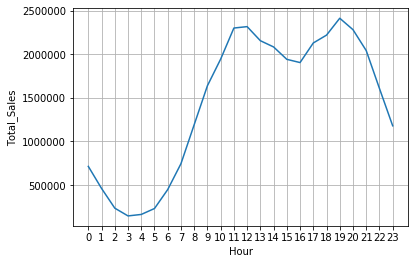

In [34]:
# Plotting
sns.lineplot(data=hour, x="Hour", y="Total_Sales");
plt.xticks(hour["Hour"]);
plt.grid();

### What products are most often sold together?

In [36]:
# The products are sold together when they have the same order ID, therefore we need only the row that have
# the same number for Order ID, and we'll assign it to a new dataframe
products=df[df["Order ID"].duplicated(keep=False)]
products.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Hour
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11


In [37]:
# Now, we'll join the produts which has the same order ID (grouped) and we'll create a new column. After that, we'll
# remove the duplicates 
products["Grouped"]=products.groupby("Order ID")["Product"].transform(lambda x:', '.join(x))
products=products[["Order ID", "Grouped"]].drop_duplicates()

C:\Users\Matheus\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# Here we'll iterate the column Grouped to combinate the values that has the same info in their row
from itertools import combinations 
from collections import Counter 

count=Counter()
for row in products["Grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(1):
    print("Produts that are more often sold together are:", key)

    

Produts that are more often sold together are: ('iPhone', ' Lightning Charging Cable')


### What product sold the most? Why do you think it sold the most?

In [39]:
# To find this answer we need to create a new variable and assign the product column grouped 
sold_most1=df.groupby("Product")["Quantity Ordered"].sum()
sold_most=pd.DataFrame(data=sold_most1) # Creating a dataframe 
sold_most.reset_index(inplace=True)
sold_most=sold_most.sort_values(by='Quantity Ordered',ascending=False)
sold_most.iloc[0] # Answer

Product             AAA Batteries (4-pack)
Quantity Ordered                     31017
Name: 5, dtype: object

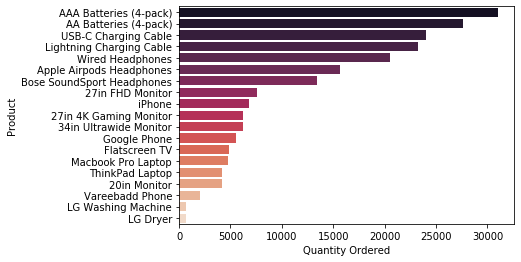

In [40]:
# Plotting in sns
sns.barplot(x="Quantity Ordered",y="Product",data=sold_most,palette='rocket');

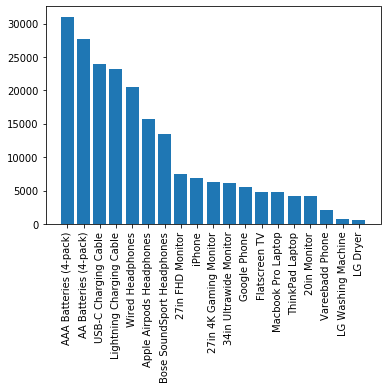

In [41]:
# Plotting in plt
plt.bar(sold_most["Product"],sold_most["Quantity Ordered"])
plt.xticks(sold_most["Product"],rotation='vertical')
plt.show()

- The AAA Batteries are the most sold product. My hypothesis it is because they are bery cheap product. Lets confirm or not this statement

In [42]:
# Lets create a new dataframe with the mean values of the product prices
cheap1=df.groupby("Product")["Price Each"].mean()
cheap=pd.DataFrame(data=cheap1)
cheap.reset_index(inplace=True)
cheap

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


In [43]:
# Now, we'll merge those both dataframe to create a visualization plot with both y axes
merg=pd.merge(sold_most,cheap,how='inner')

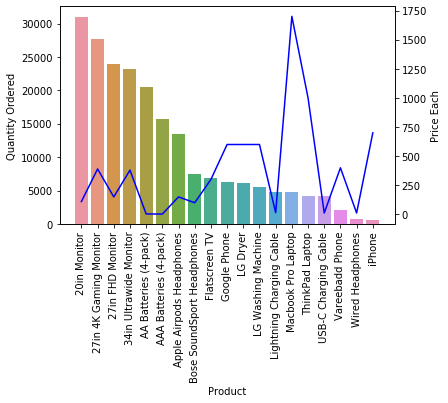

In [44]:
# Plotting
sns.barplot(x="Product",y="Quantity Ordered",data=merg);
plt.xticks(rotation=90);
ax2 = plt.twinx();
sns.lineplot(x="Product",y="Price Each",data=merg, color="b", ax=ax2);